In [1]:
%matplotlib notebook 

import numpy
import matplotlib.pyplot as plot

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)

In [43]:
numpy.random.seed(1234)

In [44]:
# data set generation
n_dim = 2
n_mean = numpy.array([0., -1.])
n_cov = numpy.diag([0.2, .5])
p_mean = numpy.array([1., 1.])
p_cov = numpy.diag([.5, .3])

# generate postive examples
n_pos = 50
pos_y = numpy.ones(n_pos) 
pos_x = numpy.random.randn(n_pos, n_dim) * numpy.diag(p_cov)[None, :] + p_mean[None,:]
# generate negative examples
n_neg = 50
neg_y = numpy.zeros(n_neg)
neg_x = numpy.random.randn(n_neg, n_dim) * numpy.diag(n_cov)[None, :] + n_mean[None,:]
# combine them
y = numpy.concatenate([pos_y, neg_y])
x = numpy.concatenate([pos_x, neg_x], axis=0)
# shuffle them
si = numpy.random.permutation(n_pos + n_neg)
y = y[si]
x = x[si]

# grab training examples
n_tra = numpy.round(0.5 * (n_pos + n_neg)).astype(numpy.int)

y_tra = y[:n_tra]
x_tra = x[:n_tra]

y_tes = y[n_tra:]
x_tes = x[n_tra:]

In [45]:
def perceptron(x, w, pre=False):
    def sign(y):
        return numpy.maximum(0., numpy.sign(y))
    
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sign(y)

In [46]:
def perceptron_dist(y, x, w, avg=False):
    y_ = perceptron(x, w)
    d = -(y - y_) * perceptron(x, w, pre=True)
    if not avg:
        return d
    return numpy.mean(d)

In [52]:
def perceptron_rule(y, x, w):
    y_ = perceptron(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y_tra - y_)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y_tra - y_)
    return dw

In [53]:
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

n_iter = 1000
eta = .1
old_cost = numpy.Inf
for ni in xrange(n_iter):
    pred_y = perceptron(x_tra, w)
    w += eta * perceptron_rule(y_tra, x_tra, w)
    cost = perceptron_dist(y_tra, x_tra, w, avg=True)
    print 'Perceptron cost {} after iteration {}'.format(cost, ni)
    if cost < 1e-16 or cost / old_cost >= 1.:
        print 'Converged'
        break
    old_cost = cost

Perceptron cost 0.582551655216 after iteration 0
Perceptron cost 0.527837500728 after iteration 1
Perceptron cost 0.478664151755 after iteration 2
Perceptron cost 0.43380638658 after iteration 3
Perceptron cost 0.39645853255 after iteration 4
Perceptron cost 0.36091859605 after iteration 5
Perceptron cost 0.333059742832 after iteration 6
Perceptron cost 0.30813222108 after iteration 7
Perceptron cost 0.283204699329 after iteration 8
Perceptron cost 0.258277177578 after iteration 9
Perceptron cost 0.234337507554 after iteration 10
Perceptron cost 0.212998375354 after iteration 11
Perceptron cost 0.195504710423 after iteration 12
Perceptron cost 0.185710587815 after iteration 13
Perceptron cost 0.178359758926 after iteration 14
Perceptron cost 0.171487782816 after iteration 15
Perceptron cost 0.166014329959 after iteration 16
Perceptron cost 0.160543874014 after iteration 17
Perceptron cost 0.155464596404 after iteration 18
Perceptron cost 0.150385318794 after iteration 19
Perceptron cos

In [54]:
# visualize data 
def vis_data(x, y, c='r'):
    plot.hold('on')
    for x_, y_ in zip(x, y):
        plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')

In [55]:
def vis_hyperplane(w, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

<IPython.core.display.Javascript object>


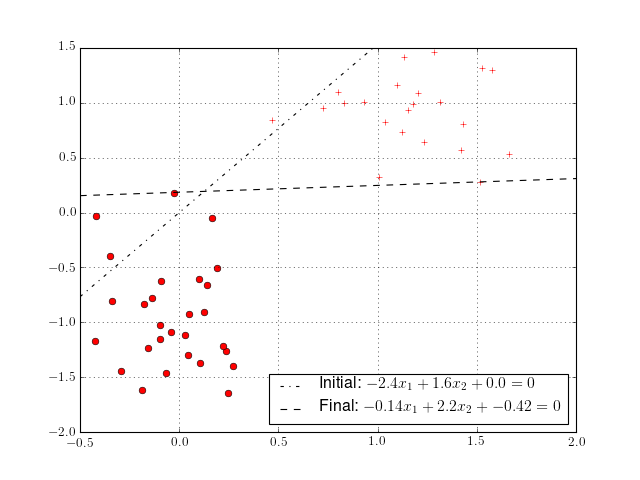

In [56]:
plot.figure()

vis_data(x_tra, y_tra, c='r')
#vis_data(x_tes, y_tes, c='b')

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')
plot.legend([plt0, plt1], [
        'Initial: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w0)),
        'Final: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w))],
           loc='best')

plot.show()

In [42]:
tra_er = numpy.sum(numpy.abs(perceptron(x_tra, w) - y_tra)) / numpy.float(len(y_tra))
tes_er = numpy.sum(numpy.abs(perceptron(x_tes, w) - y_tes)) / numpy.float(len(y_tes))

print 'Training error rate {}, Test error rate {}'.format(tra_er, tes_er)

Training error rate 0.0, Test error rate 0.06
